## Assignment-A2 Univariant Linear Regression on feature "Geography - State"
@author: Kai-Ping Wang

## Importing the libraries
Import all required libraries, and also set some libraries options.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Importing the dataset

In [20]:
file_url = 'https://raw.githubusercontent.com/aso-uts/applied_ds/master/assignment1/cancer_reg.csv'
df = pd.read_csv(file_url, encoding='ISO-8859-1')

## Checking the dataset
Check the data structure and information to be sure if data processing is required

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [22]:
df.describe(include='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(54545.6, 61494.5]",NaN,NaN,NaN,"Wood County, Wisconsin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,39.570725,42.145323,NaN,2.479662,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,5.226017,5.292849,NaN,0.429174,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,22.400000,22.300000,NaN,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,36.350000,39.100000,NaN,2.370000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,39.600000,42.400000,NaN,2.500000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,42.500000,45.300000,NaN,2.630000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677


## Data Processing
As we are going to use State information from Geography column, we have to extract/split the column to state and county first. Then we will convert categorical data into dummy variables, so that we can put it into linear regression model to fit.

In [23]:
df_split = df.copy()
df_split[['county','state']] = df['Geography'].str.split(', ',1,expand=True)
df_split.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,county,state
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,Kitsap County,Washington
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,Kittitas County,Washington
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,Klickitat County,Washington
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,Lewis County,Washington
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,Lincoln County,Washington


In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X = enc.fit_transform(df_split[['state']]).toarray()
enc.categories_

[array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)]

## Run Linear Regression
Run the univariant linear regression on state against TARGET_deathRate. 

Then print out the score and MSE, and also draw the diagram of ground truth and prediction model.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
reg = LinearRegression()
y = df_split[['TARGET_deathRate']]
reg.fit(X,y)
print("Score is %.4f" % reg.score(X,y))
y_pred = reg.predict(X)
print("MSE is %.4f" % mse(y, y_pred))

Score is 0.3357
MSE is 511.4108


In order to draw the diagram with proper line, we have to have x-axis in alphabetical order.

In [26]:
X_order = enc.categories_[0]

Draw the diagram with our prediction model and gound truth

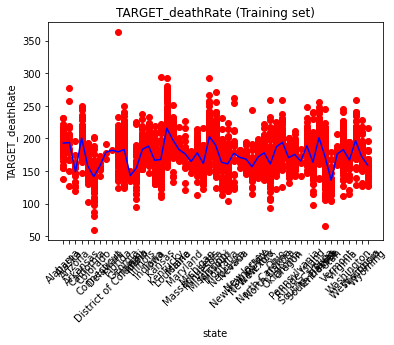

In [27]:
plt.plot(X_order,reg.predict(enc.transform(X_order.reshape([51,1])).toarray()), color = 'blue')
plt.scatter(df_split.state, y, color = 'red')
plt.xticks(rotation=45)
plt.title('TARGET_deathRate (Training set)')
plt.xlabel('state')
plt.ylabel('TARGET_deathRate')
plt.show()